# Hand In 3 - Frequent patterns

Welcome to the handin on frequent patterns. 
This handin corresponds to the topics in Week 16--19 in the course.

The handin IS 
* done individually
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Blackboard no later than **May 24th kl. 8.59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **80**. For the maximum grade you need to get at least _65 points_. The minimum grade (02 in the Danish scale)
requires **at least** 24 points, with at least 8 points on each of the three Parts (Part 1,2,3).
Good luck!

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

In [1]:
import itertools
from itertools import combinations

import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import tabulate
from tqdm import tqdm

import sys
sys.path.append('utilities')
from load_data import load_dblp_citations

# Part 1: Subgraph mining
In this part, we will work with subgraph mining algorithms. We will first solve some theory exercises and then implement two simple algorithms. 

## Task 1.1 DFS codes

### Task 1.1.1 (6 points)
<span style='color: green'>**\[Compute by hand\]**</span> the canonical (i.e., minimal) DFS code for the graph below. Try to eliminate some codes without generating the complete search tree. Provide sufficient justification on why some of the codes can be safely eliminated. *Hint*: you can eliminate a code if you can show that it will have a larger code than some other code (e.g., using label ordering, degree). 

<div>
<img src="images/dfs-codes.png" width="300">
</div>

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.1.2 (4 points)
<span style='color: green'>**\[Describe\]**</span> an extension to both the DFS-code notation and the rules for the lexicographic ordering that handles the case of *directed* graphs. If that is not possible, state why.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.1.3 (3 points)
<span style='color: green'>**\[Describe\]**</span> (no need for pseudocode) a suitable way to find the _maximum_ DFS-code from the rules for _minimum_ DFS-codes that you already know from the lecture.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 1.2 Maximum Independent Set

### Task 1.2.1 (6 points)
<span style='color: green'>**\[Prove\]**</span> that the Maximum Independent Set (MIS) support is anti-monotone, i.e., the support of a pattern $P'$ is no larger than _any_ pattern $P$ included in $P'$ (that is, $P$ is a sub-pattern of $P'$). To guide you into the proof, start from a set of matchings of the pattern $P'$ which corresponds to an independent set of nodes $I'$ in the overlap graph $G'_{O}$, same for the set of nodes $I$ in the overlap graph $G_O$ of $P$. Observe (_Observation 1_) that the **all** the matchings $f'$ of $P'$ contain matchings $f$ of $P$. Also observe (_Observation 2_) that if you take two matchings $f_1'$ and $f_2'$ of $P'$ and the corresponding matchings $f_1$ and $f_2$ of $P$ overlap, so will the matchings $f_1'$ and $f_2'$. Given these two observation what can you deduce on the independent sets $I'$ of $G'_O$ and $I$ of $G_O$?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.2 (6 points)

<span style='color: green'>**\[Implement\]**</span> a simplified version of the Maximum Indepent Set (MIS) support. Your task is to construct an algorithm that takes in input a pattern $P$ and the matches of the pattern in the graph $G$ and finds the Maximum Independent Set (MIS) support. Since finding the MIS is NP-hard your exercise is to implement a simple greedy approximation algorithm.

In [ ]:
def mis_support(P, matches): 
    """
    Returns the MIS support of a pattern. 

    Parameters
    ----------
    P:       The pattern represented as a networkx undirected graph object
    matches: A list of subgraph isomorphic matches. Each match is a dictionary id_node_pattern -> id_node_graph
    """
    mis = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return mis

To test the code you can use the graph and code below. 

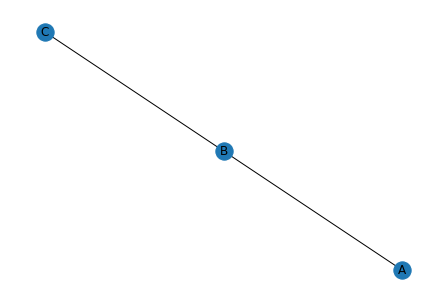

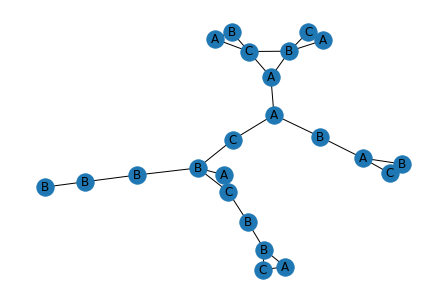

{1: 1, 2: 2, 3: 3}
{1: 1, 2: 2, 5: 3}
{8: 1, 9: 2, 10: 3}
{11: 1, 12: 2, 10: 3}
{11: 1, 12: 2, 13: 3}
{14: 1, 12: 2, 13: 3}
{14: 1, 12: 2, 10: 3}
{17: 1, 16: 2, 15: 3}
{21: 1, 19: 2, 20: 3}


NameError: name 'mis_support' is not defined

In [2]:
from networkx.algorithms import isomorphism

# Example pattern
P = nx.Graph()
P.add_nodes_from([(1,{"label":"A"}), (2,{"label":"B"}), (3,{"label":"C"})])
P.add_edges_from([(1,2),(2,3)])
labels = nx.get_node_attributes(P, 'label') 
plt.figure(1)
nx.draw(P,labels=labels)

# Example graph
G = nx.read_gml("data/graph.gml", label='id')
labels = nx.get_node_attributes(G, 'label') 
pos = nx.spring_layout(G)
plt.figure(2)
nx.draw(G,pos, labels=labels)

plt.show()

# Find the matches of P in G
nm = isomorphism.GraphMatcher(G,P,node_match=isomorphism.categorical_node_match("label", "A"))
matches = []
for subgraph in nm.subgraph_monomorphisms_iter():
    matches.append(subgraph)
    print(subgraph)
    
print("The MIS support for pattern %s in G is: %f" %(P.nodes, mis_support(P, matches)))

# Part 2: Frequent itemsets
We have learned the Apriori and FP-Growth algorithms for mining frequent itemsets. In this part, we will implement these algorithms and test them against each other. 

We will use the anonymized real-world `retail market basket` data from: http://fimi.ua.ac.be/data/.
This data comes from an anonymous Belgian retail store, and was donated by Tom Brijs from Limburgs Universitair Centrum, Belgium. The original data contains 16,470 different items and 88,162 transactions. You may only work with the top-50 items in terms of occurrence frequency.
_Hint:_ We have used this dataset before.

The variable **retail_small** contains the top-50.

In [3]:
from load_data import load_market_basket


def filter_transactions(T, k=50):
    """
        Keep only the top k items in the transactions.
        Remove transactions that become empty.
    """
    # Count occurences of each item
    counts = [0] * 16470
    for t in T:
        for i in t:
            counts[i] += 1

    # Sort and select top k
    counts = np.array(counts)
    order  = np.argsort(counts)[::-1] # reverse the sorted order

    indexes_to_keep = order[:k]       # Keep the top k items
    index_set = set(indexes_to_keep)  # Convert to python set for efficiency

    # Filter transactions
    T_new = [t_ for t_ in  [list(filter(lambda i: i in index_set, t)) for t in T]  if t_]
    return T_new

retail = load_market_basket()
retail_small = filter_transactions(retail)

## Task 2.1 A Priori algorithm

### Task 2.1.1 (7 points)
<span style='color: green'>**\[Implement\]**</span> the Apriori algorithm. You can look at your implementation from the exercises (note that this one is slightly different to simplify comparison with FP-Growth). 

__Hint__: You may want to create a seperate helper function for candidate generation, to simplify your code.

In [ ]:
def apriori_algorithm(T, min_support=1000):
    """
        Apriori algorithm for mining frequent itemsets and association rules. 
        This implementation should just find frequent itemsets, and ignore the rule generation.
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     int: The total number of occurences needed for an itemset to be considered frequent
        
        Outputs:
            itemsets:        Dictionary of with keys as frequent itemset, and value as the total count of this itemset.
                             If you prefer to retun the itemsets in a list, that is fine, 
                             but you will then need to modify the experiment code for it to work.
    """
    itemsets = dict()
    ### YOUR CODE HERE
      
    
    ### YOUR CODE HERE
    return itemsets

Test your code below

In [ ]:
#  USE retail_small TO TEST YOUR IMPLEMENTATION (Or it will be super slow!)

### YOUR CODE HERE


### Task 2.1.2 (2 points)
<span style='color: green'>**\[Implement\]**</span> a small piece of code that runs Apriori on the data-set (using the **retail** variable and not the small one) and tries a few different values of min_support. 

<span style='color: green'>**\[Describe\]**</span> how large does min_support need to be before no itemsets of size 2 are found? 

Note that the dataset is reasonably large, so this can take a while depending on your value of min_support.

In [ ]:
### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 2.1.3 (4 points)

<span style='color: green'>**\[Describe\]**</span> an **efficient** extension of the Apriori algorithm that takes in input a max_support as well as the min_support and returns all the itemsets $X$ that have $min_support \leq S(X) \leq max\_support$. Note that returning all the itemsets satisfying the min_support and then prune them based on the max_support is not an **efficient** solution.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 2.2 FP-Growth

### Task 2.2.1 (7 points)
<span style='color: green'>**\[Implement\]**</span> the FP-Growth below. Note that you only need to implement growing the tree, building the header table, and the add_path method. The parts you need to implement are clearly marked in the code.

In [ ]:

class FP_Tree:
    def __init__(self, T, min_support=1000):
        """
        Constructor for FP_Tree. Should correctly build an FP-Tree with header table.
        Hint: I strongly advise you to implement the missing sections of the Node class before this one
        
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     The total number of occurences needed to keep the itemset.
        """
        self.min_support    = min_support
        self.header_table   = {}
        self.root           = Node(header_table = self.header_table)
        
        ### YOUR CODE HERE
        raise Exception("Not implemented: FP_Tree constructor") # These are added where you need to make changes so you don't miss something. You should of course delete them
            
        ### YOUR CODE HERE
    
    
    ### Common functions for FP-tree and Conditional FP-tree
    ### You do not need to modify the rest of this class
    def generate_pattern(self, keys, support):
        return tuple(keys + self.get_suffix()), support
    
    def get_suffix(self):
        return []
    
    # This is the main function for generating frequent itemsets. You do not need to modify this,
    # but I recommend reading and trying to understand it.
    def mine_frequent_itemsets(self, res=None):
        if res is None: res = []
        
        if self.root.is_single_path():
            keys = list(self.header_table.keys())
            key_idx = {k:i for i, k in enumerate(keys)}
            counts = [self.header_table[k].count for k in keys]
            
            for key_pair in itertools.chain(*[itertools.combinations(keys, k) for k in range(1, len(keys)+1)]):
                support = min([counts[key_idx[k]] for k in key_pair])
                if support >= self.min_support: 
                    res.append(self.generate_pattern(list(key_pair), support))
         
        else: # Not single path
            for key, node in self.header_table.items():
                support = node.support()
                
                if support >= self.min_support:
                    res.append( self.generate_pattern([key], support) )
                
                basis = []
                while node is not None:
                    curr_node = node
                    node = node.nodelink
                    
                    if curr_node.parent is None:  continue
                        
                    path = curr_node.path(limit=curr_node.count)[:-1]
                    if len(path) == 0:  continue
                        
                    basis.append( path )
                    
                if len(basis) == 0: continue
                    
                conditional_tree = Conditional_FP_Tree(self.min_support, [key] + self.get_suffix(), basis)
                if conditional_tree.root is None: continue
                    
                conditional_tree.mine_frequent_itemsets(res=res)
        return res


# You don't need to modify anything in this class
class Conditional_FP_Tree(FP_Tree):
    def __init__(self, min_support, suffix, basis): 
        self.min_support    = min_support
        self.suffix         = suffix
        self.header_table   = {} # This will hold all unique items
        
        self.root           = Node(header_table=self.header_table)
        
        self.build_tree(basis)
        # self.root           = prune(self.root, min_support)
        if self.root is None: print("WARNING: root is empty after pruning")
        
    def build_tree(self, basis):
        for b in basis:
            count = b[0][1]
            path = list(map(lambda x: x[0], b))
            for i in range(count):
                self.root.add_path(path)
    
    def get_suffix(self):
        return self.suffix

class Node:
    def __init__(self, header_table, value=None, parent=None, path=None):
        """
        Constructor for Node class, which is used for the FP-Tree. 
        Inputs:
            header_table:    Dict. Should be same dict for all nodes in the tree
            value:           Integer id of the item the node represents
            parent:          Parent Node. None if root node
            path:            List of node values for a path that should start in this node.
        """
        
        self.children     = {}
        self.header_table = header_table 
        self.nodelink     = None
        self.value        = None
        self.parent       = None
        self.count        = 0
        
        if value is not None: # Only root node should have None as value
            self.value          = value
            self.parent         = parent
            
            # YOUR CODE HERE
            # TODO: Make sure header table links and node links work as intended
            raise Exception("Not implemented: Node contructor")

            # YOUR CODE HERE
        
        if path is not None: 
            self.add_path(path)
            
    
    def add_path(self, path):
        """
        Function for adding a path to tree. 
        Should follow an existing path and increment count while such a path exists. 
        If no path exists (or only partial path exists), this function should create or complete such a path
        Hint: Recursion might be helpful.
        Inputs:
            path:            A list node values. 
                             Example: path = [1, 2, 5]
        """
        
        ### YOUR CODE
        raise Exception("Not implemented: Node.add_path")
        
        ### YOUR CODE
    
    
    # Functions for frequent items-sets and rule mining below. You do not need to modify these
    def is_single_path(self):
        if   len(self.children) == 0: return True 
        elif len(self.children) >  1: return False
        else:  # len == 1
            key = next((k for k in self.children.keys()))
            return self.children[key].is_single_path()
    
    def support(self, verbose=False):
        if verbose: print("Counting support, this value is ", self.value, " with count ", self.count, " and parent ", self.parent.value)
            
        if self.nodelink is not None: return self.count + self.nodelink.support(verbose)
        else:                         return self.count
    
    def path(self, limit=-1):
        if self.value is None: 
            return []
        else:                  
            count = self.count if limit == -1 else min(self.count, limit)
            return self.parent.path(limit=limit) + [(self.value, count)]
    
    def print(self, indent="", spacing="----|-"):
        print(indent + str(self.value) + ":" + str(self.count))
        for v in self.children.values():
            v.print(indent=indent + spacing)
            

In [ ]:
### YOUR CODE HERE

### Task 2.2.2 (2 points)

<span style='color: green'>**\[Implement\]**</span> a small piece of code that runs FP-Growth on the **retail** data-set and tries a few different values of min_support. 

<span style='color: green'>**\[Motivate\]**</span> how large does min_support need to be before all itemsets of size 1 and 2 are found but no itemsets of size 3? (Note that there are multiple such min_support that are correct)

In [ ]:
### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 2.3 Comparing A priori and FP-Growth (3 points)
Run the experiment below.

<span style='color: green'>**\[Describe\]**</span> to what extent FP-Growth has an advantage over Apriori. In particular, focus on when, how, and why Apriori can be faster / slower than FP-Growth. 

In [ ]:
# Script for testing the runtime of your algorithms. 
# WARNING: This will take a reasonably long time to run.

import numpy as np
import time
    
def sample(n=200, alphabet_size=5):
    candidates  = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])[:alphabet_size]
    m = candidates.shape[0]
    
    T = []
    for i in range(n):
        size = int(np.random.rand() * (m)) + 1
        T.append(list(candidates[np.random.permutation(m)[:size]]))
        
    return T

def test():
    # If you want to test it quickly, you can modify "transaction_lengths" and "alphabet_sizes" temporarily. 
    # This will give you errors in the plotting (next code cell) though.
    # Make sure you use the original values for "transaction_lengths" and "alphabet_sizes" for your final version.
    transaction_lengths = [2**i for i in range(4, 11)]
    alphabet_sizes      = [3, 6, 9, 12] 
    
    min_support = 10
    repeats     = 10
    
    stop = False
    results = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    stderrs = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    
#     print(results.shape)
    
    for i, n in enumerate(transaction_lengths):
        for j, a in enumerate(alphabet_sizes):
            print(" - - " * 4, "n=%d,a=%d" % (n, a), " - - " * 4)
            times = []
            for _ in range(repeats):
                T = sample(n, a)

                t0 = time.time()
                tree = FP_Tree(T, min_support=min_support)
                frequent_itemsets = tree.mine_frequent_itemsets()
                t1 = time.time() - t0

                i1 = {tuple(sorted(list(k))): v for k, v in frequent_itemsets}

                t0 = time.time()
                itemsets = apriori_algorithm(T, min_support=min_support)
                t2 = time.time() - t0

                i2 = {}
                for V in itemsets.values():
                    for k, v in V.items():
                        i2[tuple(sorted(list(k)))] = v

                assert len(i1) == len(i2)
                for k in i1.keys():
                    assert i1[k] == i2[k]

                times.append([t1, t2])

            results[i, j] = np.mean(times, axis=0)
            stderrs[i, j] = np.std(times, axis=0)
            print(np.mean(times, axis=0), "+-", np.std(times, axis=0), "\n")
            
    np.save('itemsets_runningtimes', results)  # Results are saved to avoid having to run it again if plot code needs changing
    np.save('itemsets_stderr', stderrs)
    
    return results, stderrs
        
results, stderrs = test()     



In [ ]:
import matplotlib.pyplot as plt

results = np.load('itemsets_runningtimes.npy')
stderrs = np.load('itemsets_stderr.npy')

# Plotting 
transaction_lengths = [2**i for i in range(4, 11)]
alphabet_sizes      = [3, 6, 9, 12] 

n, a, _ = results.shape
res_to_plot = np.transpose(results, (1, 0, 2))
err_to_plot = np.transpose(stderrs, (1, 0, 2))

fig, ax = plt.subplots(1, a, figsize=(4*a, 4))
for i, (res, err) in enumerate(zip(res_to_plot, err_to_plot)):
    ax[i].plot(transaction_lengths, res[:,0], label='FP-Tree', color='C1')
    ax[i].fill_between(transaction_lengths, res[:,0] - err[:,0], res[:,0] + err[:,0], alpha=0.3, linewidth=0 , color='C1')
    
    x = transaction_lengths[-1]
    ax[i].set_xlim((2**4, 2**11))
    ax[i].annotate(text='', xy=(x, res[-1,0]), xytext=(x,res[-1,1]), arrowprops=dict(arrowstyle='|-|'))
    ax[i].annotate(text='%.1f $\\times$'%(res[-1,1]/res[-1,0]), xy=(x-24,  (res[-1,1] / 2 + res[-1,0]/2)), horizontalalignment='right')
    
    ax[i].plot(transaction_lengths, res[:,1], label='Apriori', color='C2')
    ax[i].fill_between(transaction_lengths, res[:,1] - err[:,1], res[:,1] + err[:,1], alpha=0.3, linewidth=0 , color='C2')
    
    ax[i].set_title("Alphabet size: %d" % alphabet_sizes[i])
    ax[i].set_xscale('log', base=2)
    ax[i].legend()
    ax[i].set_xlabel('Number of transactions')
    ax[i].set_ylabel('Seconds')

plt.tight_layout()
    

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 3: Sequence Segmentation and LSH
The Dynamic Programming algorithm for optimally segmenting a sequence $S$ of length $n$ 
into $B$ segments, that we have introduced, is expressed by the following recursive equation:

$$
E(i, b) = \min_{j < i}\left[ E(j, b-1) + Err(j+1, i)\right]
$$

where $Err(j+1, i)$ is the error of a segment that contains items from $j+1$ to $i$.

In this part, you will have to answer some questions on this.

**Note:** 
For those of you, who are not used to analyzing algorithms: by time-complexity and space-complexity, 
we refer to the theoretical computation time and memory usage, respectively, as a function of the problem size, i.e., as a 
function of $n$ and $B$ in Problem 3. We use [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation)
to specify this. You should **not** infer it by implementing it in practice. If in doubt, ask the TA's or your favourite Computer Scientist on hand.

## Task 3.1 Sequence segmentation
### Task 3.1.1 (3 points)
<span style='color: green'>**\[Describe\]**</span> what is the default space-complexity of this algorithm?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.2 (6 points)

<span style='color: green'>**\[Describe\]**</span> what happens if we are willing to recompute some tabulated results. Can we then reduce the default space-complexity? _Exactly how_? What is the space-complexity then?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.3 (4 points)
<span style='color: green'>**\[Motivate\]**</span> what is the cost of using the space-efficiency technique described in Task 3.1.2 in terms of time-complexity.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.4 (6 points)
For the sub-problem of segmenting the $i$-prefix of sequence $S$ into $b$ segments, consider 
    the segment $M(i, b)$ that contains (if such segment exists) the middle item of 
    index $\lfloor \frac{n}{2} \rfloor$. The boundaries of $M(i, b)$ can be detected and tabulated 
    along with each $E(i, b)$ solution. 

<span style='color: green'>**\[Describe\]**</span> a method that reduces the time-complexity burden identified in Task 3.1.3, based on the above observarion. 
    _(hint: use [divide-and-conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm))_

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.5 (3 points)
<span style='color: green'>**\[Motivate\]**</span> what is the time complexity when using the technique proposed in Task 3.1.4?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 3.2 Locality Sensitive Hashing

### Task 3.2.1 (3 points)

<span style='color: green'>**\[Implement\]**</span> code that evaluate the S-curve $1-(1-s^r)^b$ for $s\in [0,1]$ for the following values of $r$ and $b$ 
1. $r = 3$ and $b = 10$
2. $r = 6$ and $b = 20$
3. $r = 5$ and $b = 50$

You can use, or modify, the helper plotting code below. 

In [ ]:
### YOUR CODE HERE


### YOUR CODE HERE


def plot_function(x,y): 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')

    # show the plot
    plt.show()
    
plot_function(x,y)

### Task 3.2.2 (2 points)

<span style='color: green'>**\[Implement\]**</span> a piece of code that, for each of the (r,b) pairs in Task 3.2.1, computes the value of $s$ for which the value of $1-(1-s^r)^b$ is exactly 1/2. 

In [ ]:
### YOUR CODE HERE


### YOUR CODE HERE

### Task 3.2.3 (3 points)

<span style='color: green'>**\[Describe\]**</span> how does this value compare with the estimate of $(1/b)^{1/r}$? 

_Hint_: Think to how the estimate varies with $b, r$

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************